In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=True, 
            debug_flag=True, 
            fake_hardware_flags=[FAKE_ARM, FAKE_PXRF])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
m.fake_pxrf_values = [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

[INFO] [1726241831.645009]:  < Status: Initialization > 
[INFO] [1726241831.698617]:  < Status: Ready > 
[INFO] [1726241831.702118]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1726241831.702817]:  ----------- READY ----------- 


[WARN] [1726241831.699685]: >>> USING FAKE HARDWARE <<<<
[WARN] [1726241831.701317]: Fake Hardware Flags: ['fake_arm', 'fake_pxrf']
[WARN] [1726241832.348423]: | Reset 


[INFO] [1726241832.406755]: ----------------
 Boundary Points:
 [(40.47220232141441, -79.9663033644222), (40.4721641341359, -79.96621077102076), (40.472259110282344, -79.96613646266547), (40.47229943062333, -79.96623556934293), (40.47220232141441, -79.9663033644222)]
----------------
[INFO] [1726241833.597392]: Width: 15 m | 60 cells
[INFO] [1726241833.598705]: Height: 15 m | : 60 cells
[INFO] [1726241833.599679]: Start: (2.9133052168181166, 5.485866189002991) m | (10, 20) cells
[INFO] [1726241833.600602]: Boundary Offset (MAP): [[0.0, 4.1469402918592095], [7.898885649279691, 0.0], [14.074594515142962, 10.616342726163566], [5.620806750841439, 14.993584199808538], [0.0, 4.1469402918592095]]
[INFO] [1726241833.601516]: Boundary Offset (GRID): [(0, 15), (30, 0), (55, 41), (21, 58), (0, 15)]
len(x1): 60, len(x2): 60, len(x1x2): (3600, 2)
[INFO] [1726241833.639994]: lengths of x1 | x2 | x1x2: 60 | 60 | (3600, 2) 
[INFO] [1726241833.652102]:  < Status: Received search area > 
[INFO] [1726241

[INFO] [1726241867.050170]: ----------- Manager Loop: adaptive -----------
[INFO] [1726241867.051331]:  < Status: Running search algo > 


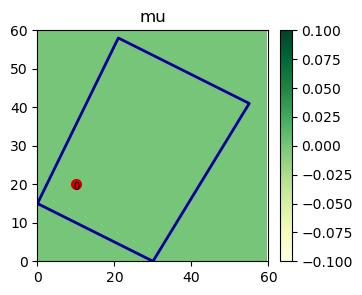

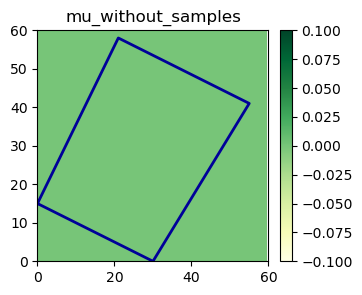

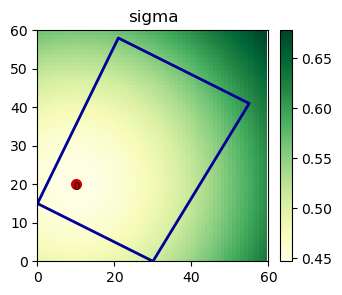

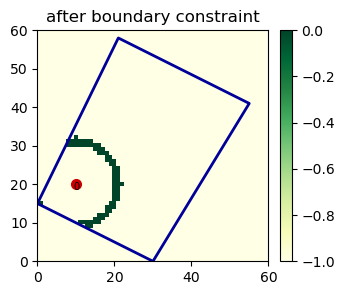

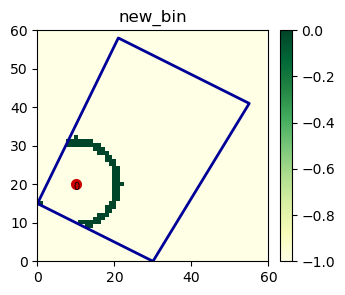

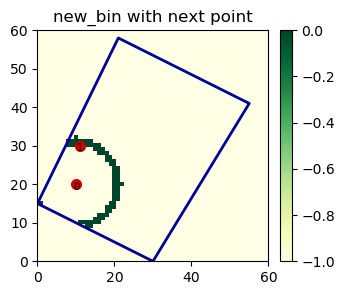

---------
[INFO] [1726241868.495116]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.47223334707325, -79.96626897371928) | (2.875, 7.625) | [11, 30] 
[INFO] [1726241868.551236]:  < Status: Received next scan loc > 
[INFO] [1726241868.552260]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=100)
Received next scan loc


In [3]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

[0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

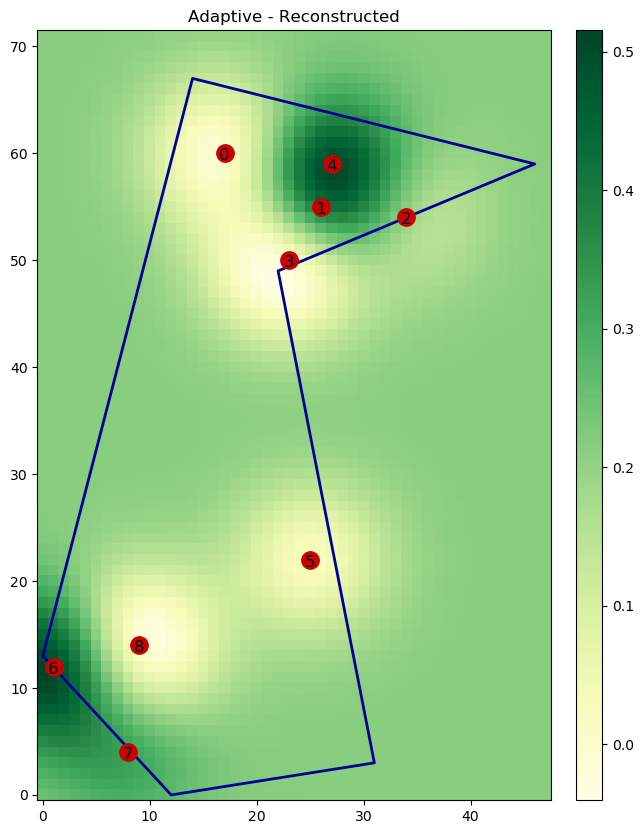

[INFO] [1726172302.500413]: Sampled at [9, 14] with value = 0.0
[INFO] [1726172302.502014]: Adaptive Norm Range: 0.5000


In [23]:
m.show()

/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


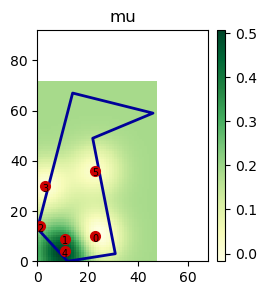

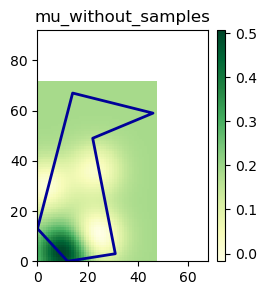

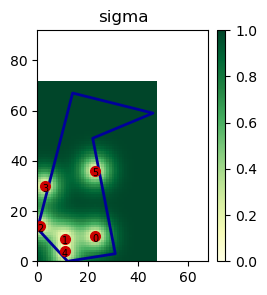

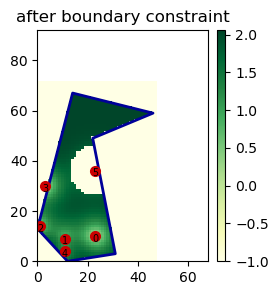

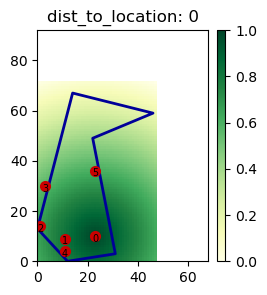

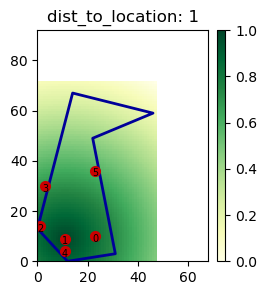

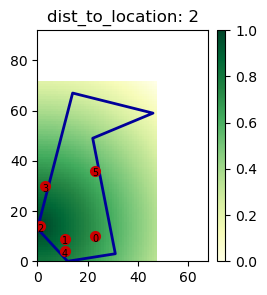

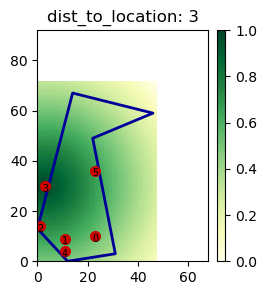

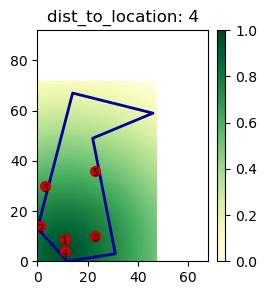

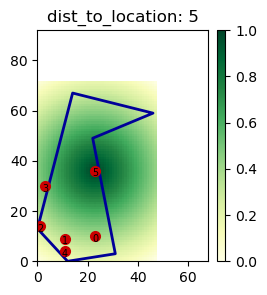

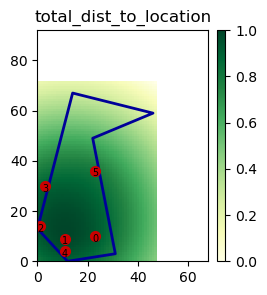

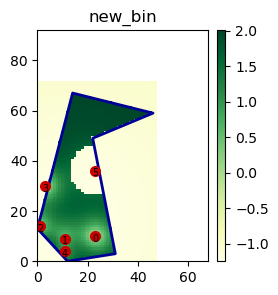

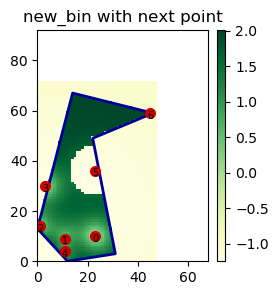

---------


[45, 59]

In [12]:
m.adaptiveROS.predict(True)

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [50]:
print("NREC 13 Sep")
print(m.adaptiveROS.sampled)
print(m.adaptiveROS.sampled_val)
print(m.adaptiveROS.gp.kernel_)
print(m.init_pos_gps)
print(m.init_pos_grid)
print(m.init_pos_map)
print(m.algorithm_type)
print(m.algorithm_total_samples)
print(m.pxrf_mean_value)

NREC 13 Sep
[[10, 20], [8, 27], [8, 38], [13, 44], [19, 53], [35, 49], [51, 40], [36, 14], [26, 0], [0, 15], [6, 10], [0, 18], [26, 31], [42, 25], [16, 7], [20, 15], [40, 36], [23, 41]]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 990, 280, 1532, 0.0, 0.0, 2370, 0.0, 0.0, 0.0]
RBF(length_scale=5)
(40.4722140769975, -79.96626886501515)
(10, 20)
(2.9092671148246154, 5.486087386496365)
adaptive
16
None


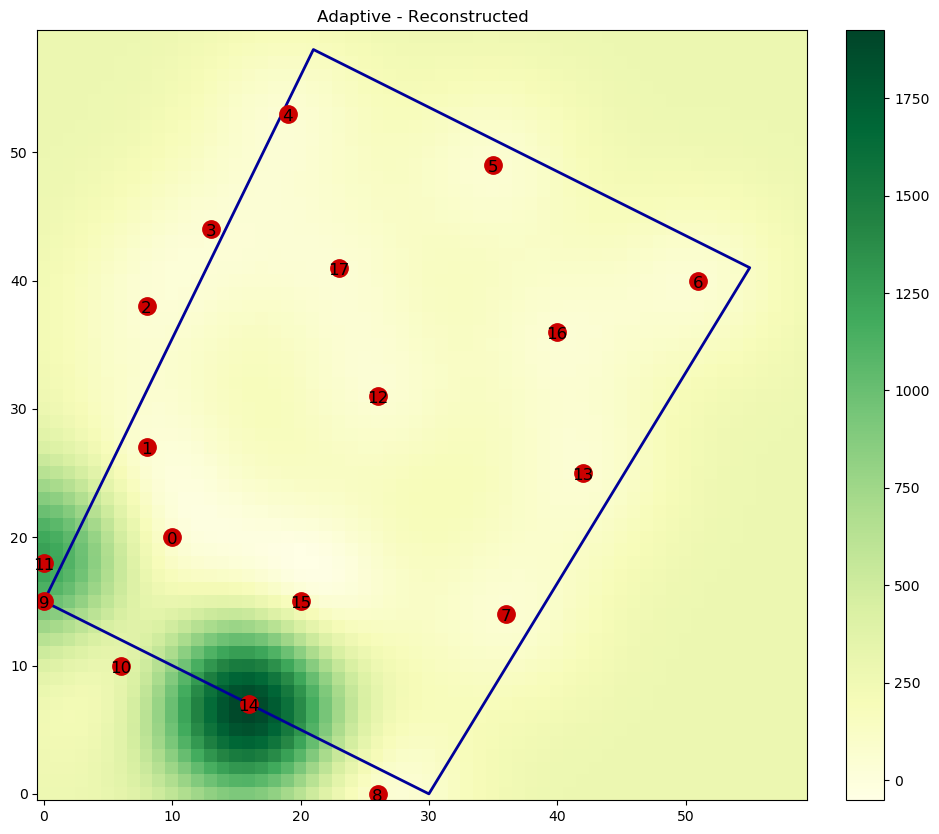

[INFO] [1726244142.178077]: Sampled at [23, 41] with value = 0.0
[INFO] [1726244142.179382]: Adaptive Norm Range: 2370.0000


In [51]:
m.show()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()